# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Fajar Andikha
- Email: andhikadika7878@gmail.com
- Id Dicoding: fjarandikha


## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang menghasilkan revenue tertinggi?
- Jenis pembayaran apa yang menghasilkan revenue tertinggi?

## Menyaipkan semua library yang dibuthkan

Pertama-tama kita perlu menyiapkan library yang akan kita butuhkan. Kali ini library yang kita butuhkan yaitu numpy, pandas, matplotlib, dan seaborn.

In [35]:
# import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')


## Data Wrangling

Masuk ke dalam tahap Data Wrangling, dimulai dengan gathering data.

### Gathering Data

Kali ini saya meng-import data secara bersamaan pada satu cell.

In [63]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_payments_df = pd.read_csv("order_payments_dataset.csv")
orders_df = pd.read_csv("orders_dataset.csv")
product_nametranslate_df = pd.read_csv("product_category_name_translation.csv")
product_df = pd.read_csv("products_dataset.csv")

In [43]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [44]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [45]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [46]:
product_nametranslate_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [47]:
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


### Assessing Data

Kemudian assessing data. Pada tahap ini kita mencari data yang terdapat kecacatan seperti missing value.

Sebelum melakukan cleaning data saya menggabungkan data-data tersebut menjadi satu tabel agar dapat lebih mudah melakukan cleaning.

In [64]:
data = pd.merge(orders_df,order_payments_df, on="order_id", how='inner')
data = data.merge(order_items_df, on="order_id", how='inner')
data = data.merge(product_df, on="product_id", how='inner')
data = data.merge(product_nametranslate_df, on='product_category_name', how='inner')
data.shape

(115878, 27)

### Cleaning Data

Pada proses cleaning data, yang dilakukan yaitu menghapus beberapa kolom yang tidak dipakai.

In [65]:
data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1205
order_delivered_customer_date    2495
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_cate

Karena data yang kosong tersebut tidak terpakai, maka saya memutuskan untuk drop column tersebut.

In [66]:
data.drop(['product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], axis=1, inplace=True)

Kemudian karena terdapat satu data missing value. Saya menghapus 1 data tersebut dan mereset index.

In [67]:
data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_category_name_english    0
dtype: int64

Setelah data dibersihkan, Kemudian mengelompokkan kategori menjadi lebih umum dari product untuk mempermudah proses analisis data.

In [68]:
def classify_category(x):
    categories = {
        'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
        'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
        'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff'],
        'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
        'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art'],
        'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
        'Food & Drinks': ['food_drink', 'drinks', 'food'],
        'Books & Stationery': ['books_general_interest', 'books_technical', 'books_imported', 'stationery'],
        'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
    }
    for category, keywords in categories.items():
        if x in keywords:
            return category
    return None

data['product_category'] = data['product_category_name_english'].apply(classify_category)

In [69]:
data['product_category'].value_counts()

Electronics                30379
Furniture                  28576
Entertainment              13860
Beauty & Health            13571
Home & Garden              13121
Fashion                     9983
Books & Stationery          3514
Industry & Construction     1673
Food & Drinks               1201
Name: product_category, dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115878 non-null  object 
 1   customer_id                    115878 non-null  object 
 2   order_status                   115878 non-null  object 
 3   order_purchase_timestamp       115878 non-null  object 
 4   order_estimated_delivery_date  115878 non-null  object 
 5   payment_sequential             115878 non-null  int64  
 6   payment_type                   115878 non-null  object 
 7   payment_installments           115878 non-null  int64  
 8   payment_value                  115878 non-null  float64
 9   order_item_id                  115878 non-null  int64  
 10  product_id                     115878 non-null  object 
 11  seller_id                      115878 non-null  object 
 12  shipping_limit_date           

Setelah data dirasa cukup bersih lanjut ketahap berikutnya.

## Exploratory Data Analysis (EDA)

Pertama kita akan mencari tahu kategori dan payment type yang paling sering dibeli atau digunakan.

In [71]:
data['product_category'].value_counts()

Electronics                30379
Furniture                  28576
Entertainment              13860
Beauty & Health            13571
Home & Garden              13121
Fashion                     9983
Books & Stationery          3514
Industry & Construction     1673
Food & Drinks               1201
Name: product_category, dtype: int64

Berdasarkan data diatas kategori produk yang paling laku dijual yaitu alat elektronik dan furniture. Dan berdasarkan data tersebut kita dapat mendapatkan revenue berdasarkan prodcut kategori tersebut.

In [72]:
data['payment_type'].value_counts()

credit_card    85523
boleto         22542
voucher         6155
debit_card      1658
Name: payment_type, dtype: int64

Berdasarkan data diatas alat pembayaran yang paling sering digunakan yaitu credit card. Berdasarkan data diatas kita dapat mengembangkan informasi sehingga dapat mendapatkan berapa revenue alat pembayaran tersebut.

### Explore ...

In [73]:
grouped_data = data.groupby('product_category')[['payment_value']].sum()

sorted_data = grouped_data.sort_values(by='payment_value', ascending=False)
sorted_data

,payment_value
product_category,
Electronics,6035431.39
Furniture,5014590.36
Beauty & Health,2168333.03
Entertainment,2095011.89
Home & Garden,2084241.60
Fashion,1609671.41
Industry & Construction,482643.03
Books & Stationery,413752.16
Food & Drinks,145148.05


In [74]:
grouped_data = data.groupby('payment_type')[['payment_value']].sum()

sorted_data = grouped_data.sort_values(by='payment_value', ascending=False)
sorted_data

,payment_value
payment_type,
credit_card,15400470.50
boleto,4000783.25
voucher,398448.28
debit_card,249120.89


Selanjutnya visualisasi data

## Visualization & Explanatory Analysis

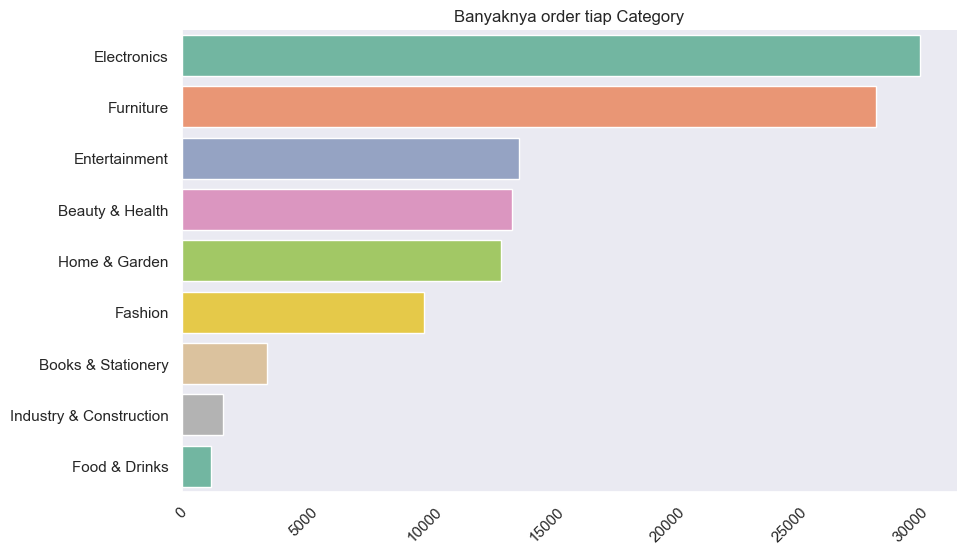

In [75]:
plt.figure(figsize=[10, 6])
sns.barplot(x = data['product_category'].value_counts().values, y = data['product_category'].value_counts().index, palette= 'Set2')
plt.title('Banyaknya order tiap Category')
plt.xticks(rotation = 45)
sns.despine()

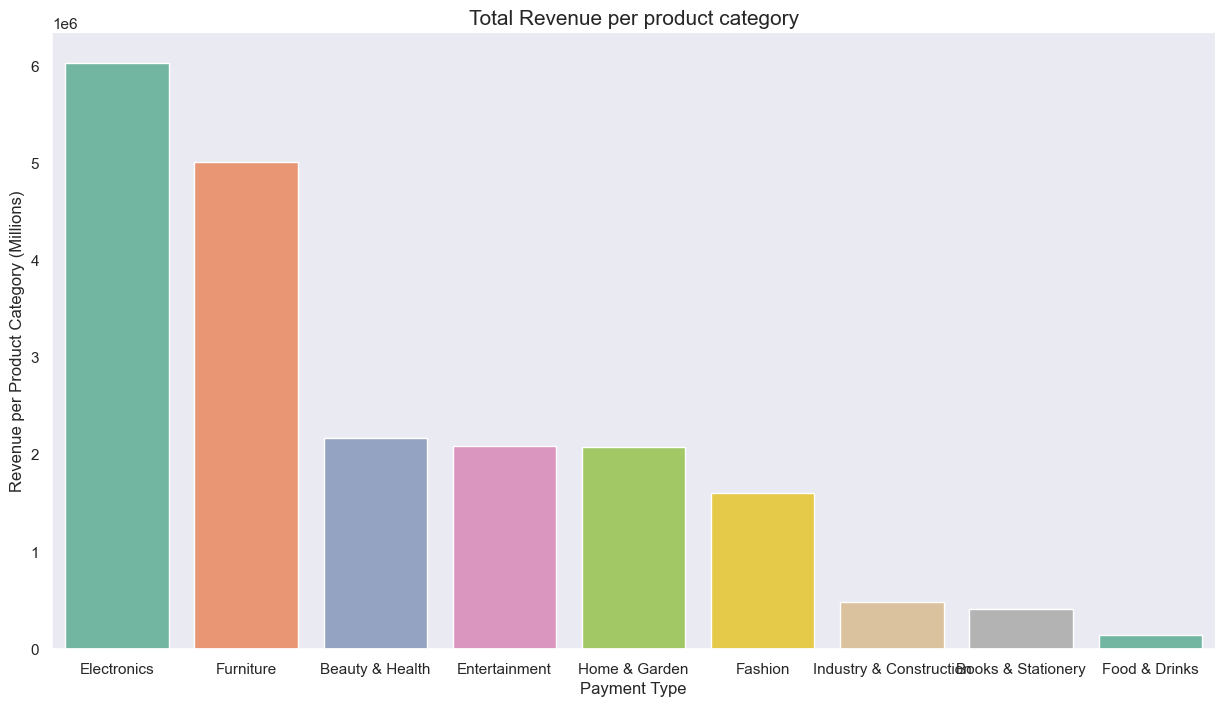

In [76]:
product_category = data.groupby('product_category')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
product_category.reset_index(inplace=True)
plt.figure(figsize=[15, 8])
sns.barplot(x = product_category.product_category, y= product_category.payment_value, palette= 'Set2')
plt.title('Total Revenue per product category', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Product Category (Millions)', fontsize= 12)
sns.despine()

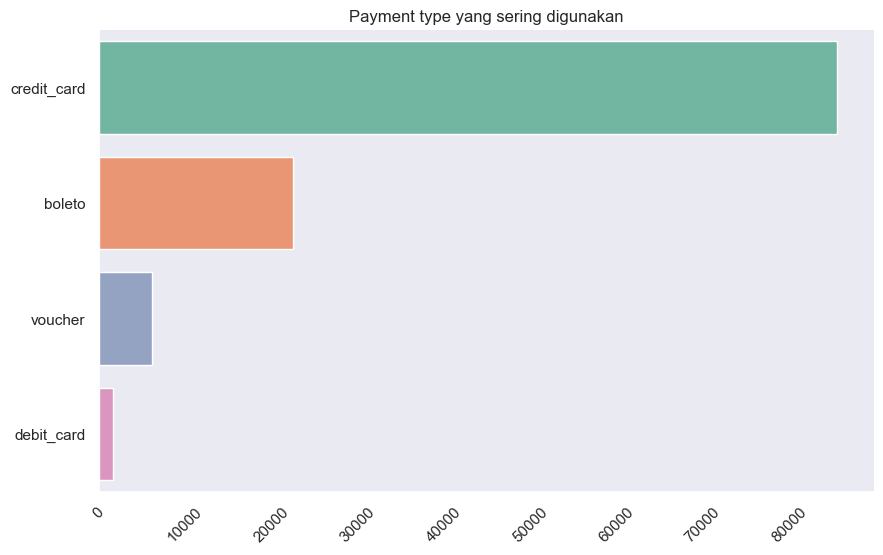

In [78]:
plt.figure(figsize=[10, 6])
sns.barplot(x = data['payment_type'].value_counts().values, y = data['payment_type'].value_counts().index, palette= 'Set2')
plt.title('Payment type yang sering digunakan')
plt.xticks(rotation = 45)
sns.despine()

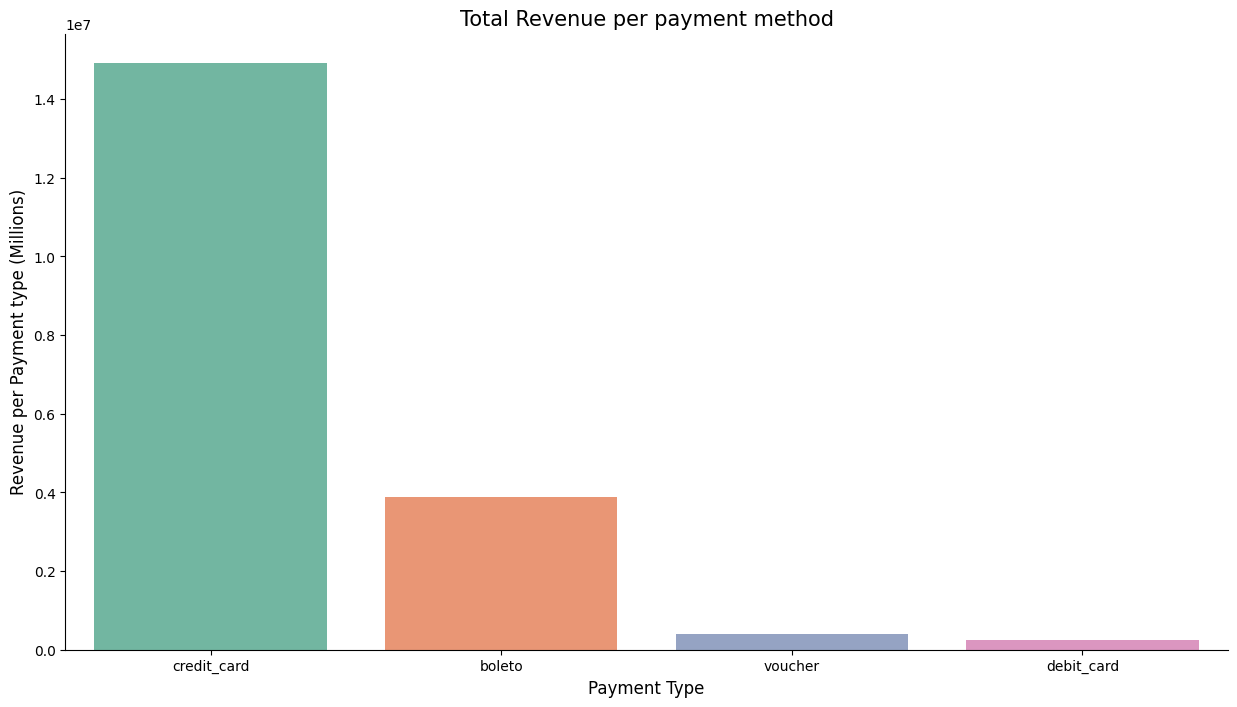

In [53]:
payment_methods = data.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'Set2')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

## Conclusion

- Product category yang menghasilkan revenue tertinggi yaitu Electronics dan disusul Furniture
- Payment method yang menghasilkan revenue tertinggi yaitu credit card karena mayoritas masyarakat menggunakan credit card

In [64]:
file_path = 'cleaned_data.csv'
data.to_csv(file_path, index=False)


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
npx: installed 22 in 5.293s
your url is: https://chubby-pants-sing.loca.lt


In [4]:
st.header('Dicoding Collection Dashboard :sparkles:')


2023-09-25 21:48:05.570 
  command:

    streamlit run C:\Users\mfaja\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()